In [8]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.set(color_codes=True) 
%matplotlib inline

from scipy import stats

In [9]:
mydata=pd.read_csv("D:\Wholesale+Customers+Data.csv")

In [10]:
mydata.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Use methods of descriptive statistics to summarize data.

In [11]:
mydata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [70]:
products=mydata[mydata.columns[+3:mydata.columns.size]]
products.T

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
Fresh,12669,7057,6353,13265,22615,9413,12126,7579,5963,6006,...,3097,8533,21117,1982,16731,29703,39228,14531,10290,2787
Milk,9656,9810,8808,1196,5410,8259,3199,4956,3648,11093,...,4230,5506,1162,3218,3922,12051,1431,15488,1981,1698
Grocery,7561,9568,7684,4221,7198,5126,6975,9426,6192,18881,...,16483,5160,4754,1493,7994,16027,764,30243,2232,2510
Frozen,214,1762,2405,6404,3915,666,480,1669,425,1159,...,575,13486,269,1541,688,13135,4510,437,1038,65
Detergents_Paper,2674,3293,3516,507,1777,1795,3140,3321,1716,7425,...,241,1377,1328,356,2371,182,93,14841,168,477
Delicatessen,1338,1776,7844,1788,5185,1451,545,2566,750,2098,...,2080,1498,395,1449,838,2204,2346,1867,2125,52


In [12]:
mydata.dropna()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [13]:
mydata2=(mydata['Channel']+mydata['Region']).min()
mydata2

'HotelLisbon'

In [29]:
mydata['Channel'].max()

'Retail'

In [30]:
mydata['Region'].max()

'Other'

In [31]:
mydata['Channel'].min()

'Hotel'

In [32]:
mydata['Region'].min()

'Lisbon'

## 1.1.2 Which Region and which Channel spent the most?
## 1.1.3 Which Region and which Channel spent the least?

In [33]:
regiondf = mydata.groupby('Region').sum()
regiondf

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [19]:
channeldf = mydata.groupby('Channel').sum()
channeldf

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


in region otheres have spent the most and oporto have spent the least

in channel hotel have spent the most and retail have spent the least

In [20]:
region_channel_df = mydata.groupby(['Region','Channel']).sum()

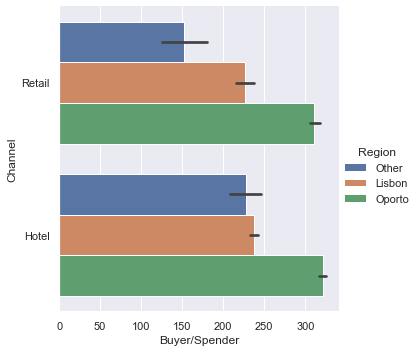

In [63]:
region_channel_df
sns.catplot(data=mydata,x="Buyer/Spender",y="Channel",hue="Region",kind="bar")

In [64]:
region_channel_df

Buyer/Spender    Fresh     Milk  Grocery  Frozen  \
Region Channel                                                     
Lisbon Hotel            14026   761233   228342   237542  184512   
       Retail            4069    93600   194112   332495   46514   
Oporto Hotel             8988   326215    64519   123074  160861   
       Retail            5911   138506   174625   310200   29271   
Other  Hotel            48020  2928269   735753   820101  771606   
       Retail           16006  1032308  1153006  1675150  158886   

                Detergents_Paper  Delicatessen  
Region Channel                                  
Lisbon Hotel               56081         70632  
       Retail             148055         33695  
Oporto Hotel               13516         30965  
       Retail             159795         23541  
Other  Hotel              165990        320358  
       Retail             724420        191752

In [22]:
products=mydata[mydata.columns[+3:mydata.columns.size]]

In [23]:
products

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?¶

In [24]:
standard_deviation_items = products.std()
standard_deviation_items

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [25]:
variance_items = products.var()
variance_items

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

## Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

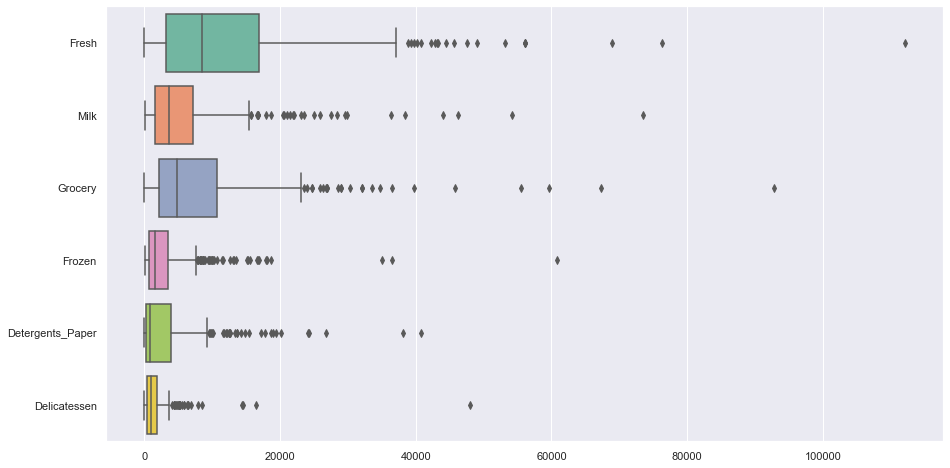

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")

Yes there are outliers in all the items across the product range (Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen
the given data srt of has an out liners as it is not necessary to remove so we will assume that the given data set is true

## On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

In [ ]:
from the given data set we can observe that from the region 

## There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [46]:
products=mydata[mydata.columns[+3:mydata.columns.size]].T
products

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
Fresh,12669,7057,6353,13265,22615,9413,12126,7579,5963,6006,...,3097,8533,21117,1982,16731,29703,39228,14531,10290,2787
Milk,9656,9810,8808,1196,5410,8259,3199,4956,3648,11093,...,4230,5506,1162,3218,3922,12051,1431,15488,1981,1698
Grocery,7561,9568,7684,4221,7198,5126,6975,9426,6192,18881,...,16483,5160,4754,1493,7994,16027,764,30243,2232,2510
Frozen,214,1762,2405,6404,3915,666,480,1669,425,1159,...,575,13486,269,1541,688,13135,4510,437,1038,65
Detergents_Paper,2674,3293,3516,507,1777,1795,3140,3321,1716,7425,...,241,1377,1328,356,2371,182,93,14841,168,477
Delicatessen,1338,1776,7844,1788,5185,1451,545,2566,750,2098,...,2080,1498,395,1449,838,2204,2346,1867,2125,52


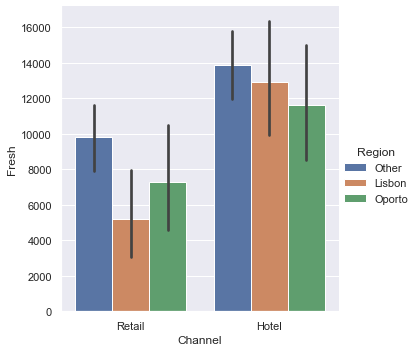

In [71]:
sns.catplot(x="Channel",y="Fresh",hue="Region",kind="bar",data=mydata)

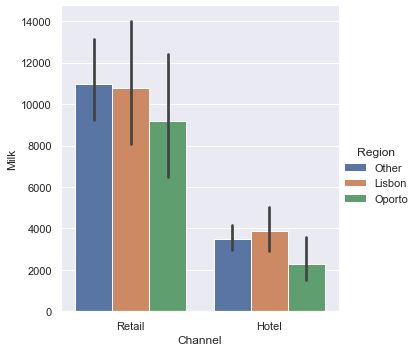

In [72]:
sns.catplot(x="Channel",y="Milk",hue="Region",kind="bar",data=mydata)

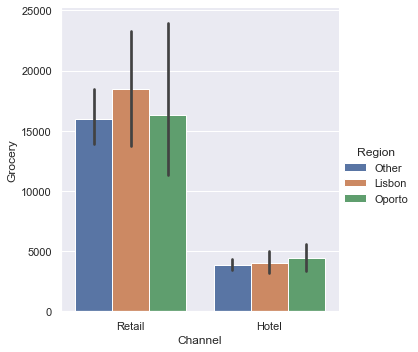

In [73]:
sns.catplot(x="Channel",y="Grocery",hue="Region",kind="bar",data=mydata)

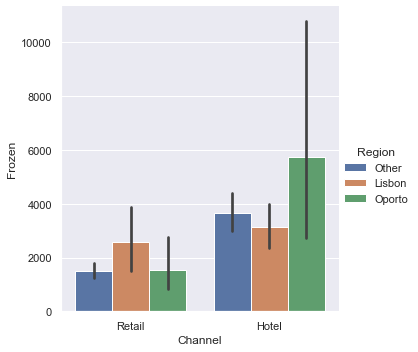

In [74]:
sns.catplot(x="Channel",y="Frozen",hue="Region",kind="bar",data=mydata)

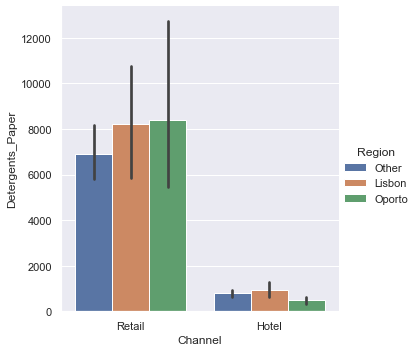

In [75]:
sns.catplot(x="Channel",y="Detergents_Paper",hue="Region",kind="bar",data=mydata)

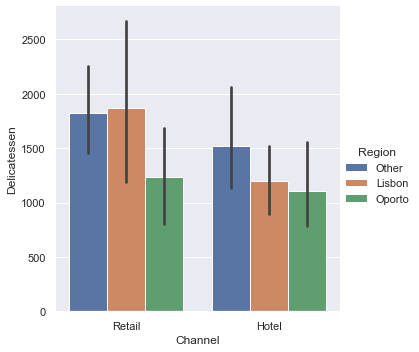

In [76]:
sns.catplot(x="Channel",y="Delicatessen",hue="Region",kind="bar",data=mydata)

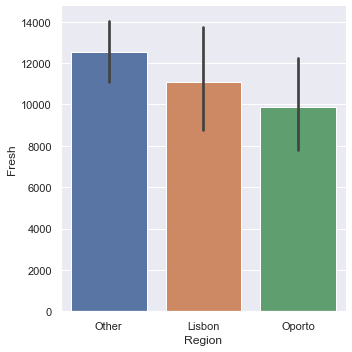

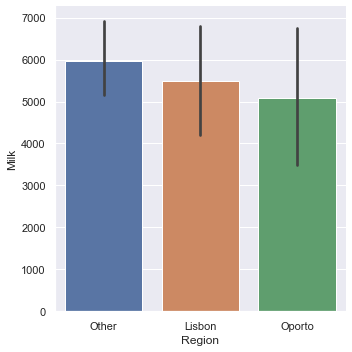

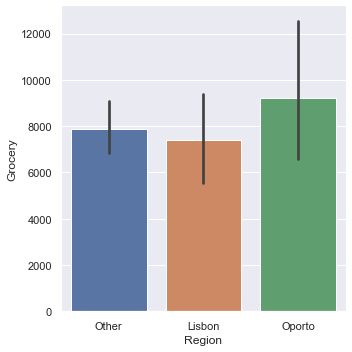

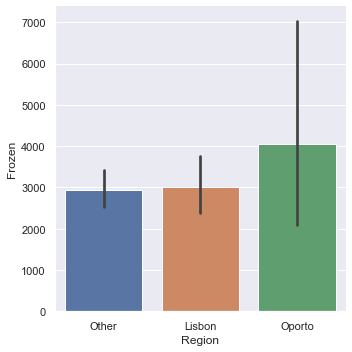

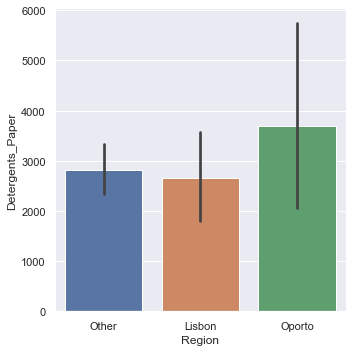

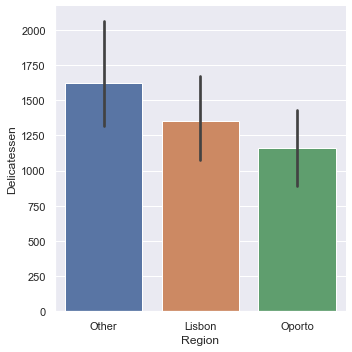

In [56]:
sns.catplot(x="Region",y="Fresh",kind="bar",data=mydata)
sns.catplot(x="Region",y="Milk",kind="bar",data=mydata)
sns.catplot(x="Region",y="Grocery",kind="bar",data=mydata)
sns.catplot(x="Region",y="Frozen",kind="bar",data=mydata)
sns.catplot(x="Region",y="Detergents_Paper",kind="bar",data=mydata)
sns.catplot(x="Region",y="Delicatessen",kind="bar",data=mydata)

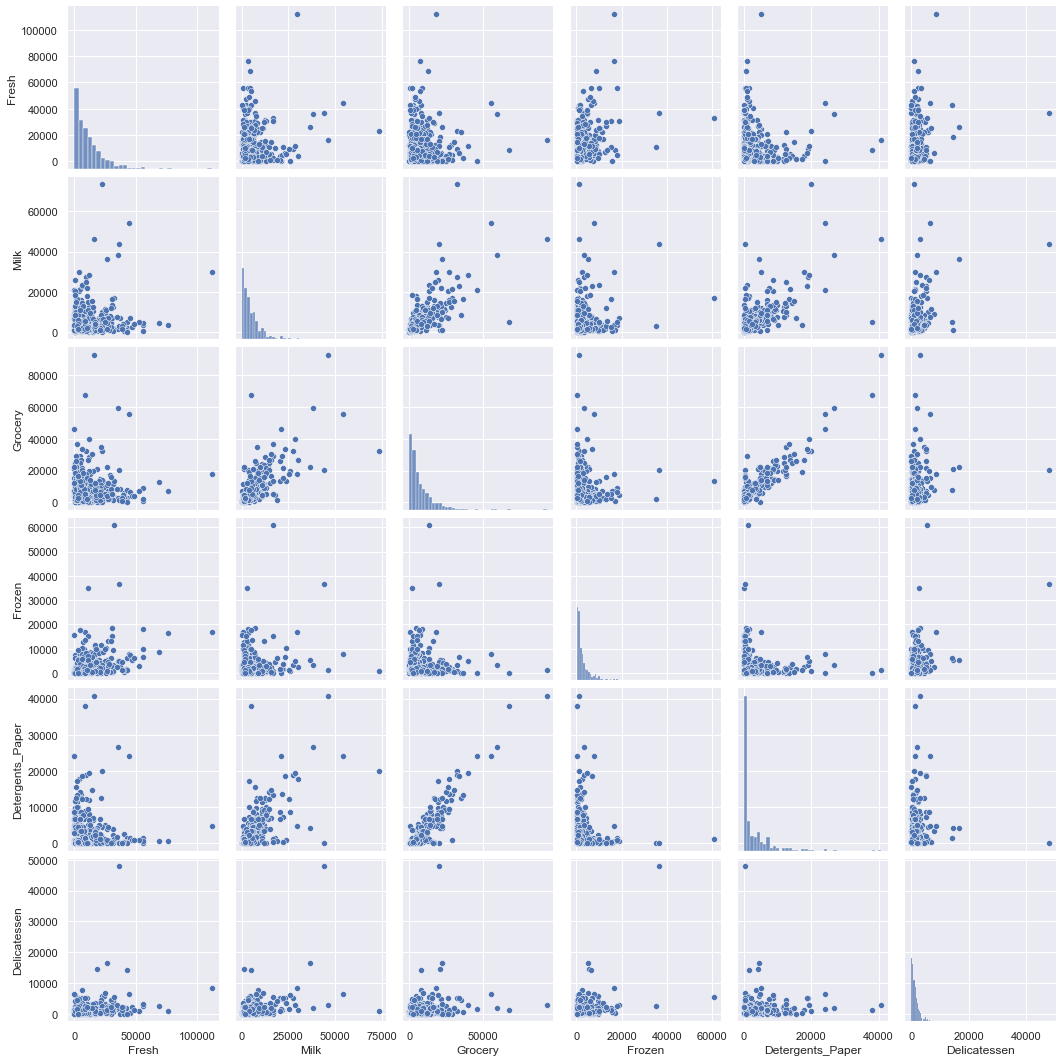

In [81]:
sns.pairplot(products)

In [84]:
mydata_new = mydata.drop(['Buyer/Spender'], axis= 1)
mydata_new.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [85]:
mydata_new['Total'] = mydata_new[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(axis=1)
mydata_new.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [87]:
results1 = mydata_new.groupby(['Region','Channel']).sum().reset_index()
results1

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,Hotel,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,1032308,1153006,1675150,158886,724420,191752,4935522


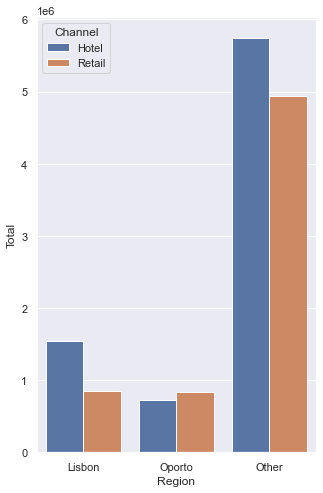

In [88]:
plt.figure(figsize=(5,8))
sns.barplot(x=results1['Region'], y=results1['Total'], hue='Channel', data =results1);
plt.show()

In [89]:
results = mydata_new.groupby('Region').sum()
resultsnew= results.drop(columns='Total')
resultsnew

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


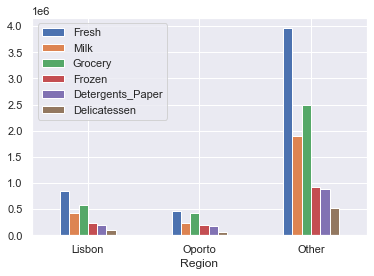

In [90]:
resultsnew.plot.bar(rot=0);